In [ ]:
#2쪽

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
#4쪽

import matplotlib.pyplot as plt

In [ ]:

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")



In [ ]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
#5쪽

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate (X[:100]):
  plt.subplot(10, 10, idx + 1)
  plot_digit(image_data )
plt.subplots_adjust(wspace=0 , hspace=0)
plt.show ()

NameError: name 'X' is not defined

<Figure size 900x900 with 0 Axes>

In [ ]:
#6쪽
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
#7쪽

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

NameError: name 'y_train_5' is not defined

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
#8쪽

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
#9쪽

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [ ]:
#10쪽 오차행렬
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5

In [ ]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
#12쪽
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

<function matplotlib.pyplot.show(close=None, block=None)>

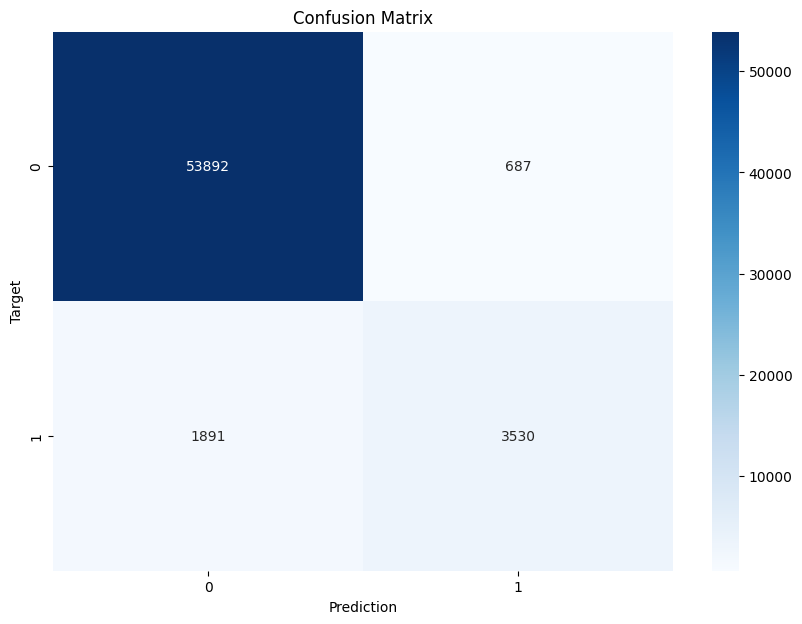

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues")
plt.ylabel('Target')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [ ]:
#14쪽

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
#15쪽
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
#16쪽

from sklearn.metrics import classification_report
report = classification_report(y_train_5, y_train_pred)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [ ]:
#18쪽
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0


In [ ]:
y_some_digit_pred = (y_scores > threshold)


In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000

In [ ]:
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([False])

In [ ]:
#19쪽
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                              method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

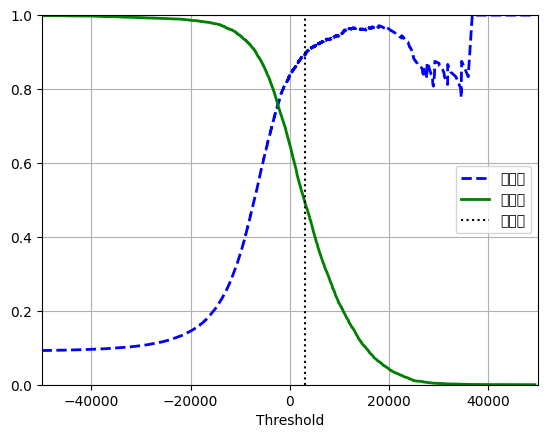

In [ ]:
#20쪽

plt.plot(thresholds, precisions[:-1], "b--", label="정밀도" , linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="임곗값")

#그리드, 범례,축, 레이블, 동그라미 추가
idx=(thresholds>=thresholds).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx],recalls[idx],"go")
plt.axis([-50000, 50000, 0,1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

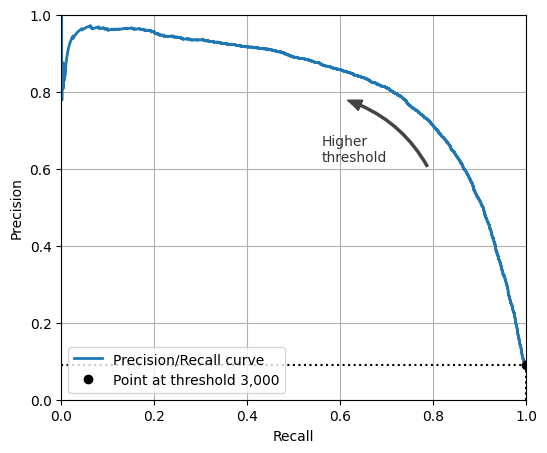

In [ ]:
#21쪽

import matplotlib.patches as patches

plt.figure (figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")

plt.plot([recalls[idx]], [precisions[idx]], "ko",
        label="Point at threshold 3,000")

plt.gca().add_patch (patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [ ]:
#22쪽
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

In [ ]:
recall_at_90_precision

0.4799852425751706

In [ ]:
#4/2일 화요일 23쪽
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

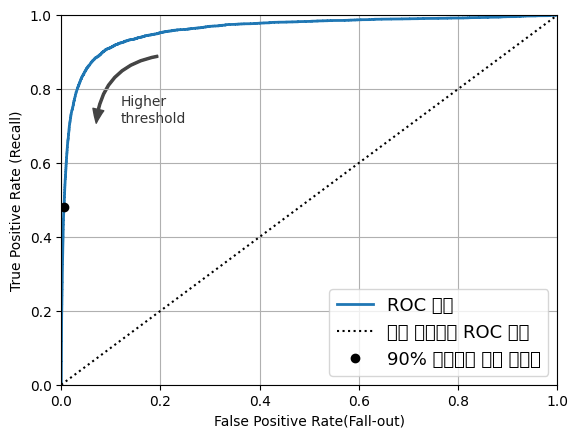

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC 곡선")
plt.plot([0, 1], [0, 1], 'k:', label="랜덤 분류기의 ROC 곡선")
plt.plot([fpr_90],[tpr_90], "ko", label="90% 정밀도에 대한 임곗값")

#추가자료분량(3쪽)
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20,0.89),(0.07,0.70),
    connectionstyle="arc3, rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.12,0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate(Fall-out)')
plt.ylabel ('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc="lower right", fontsize=13)

plt.show()


In [ ]:
#25쪽

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
#26쪽-오래걸리는부분

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

KeyboardInterrupt: 

In [ ]:
y_probas_forest[:2]

In [ ]:
y_scores_forest=y_probas_forest[:,1]

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
y_train_5, y_scores_forest)

In [ ]:
#27쪽
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="랜덤 포레스트")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [ ]:
#28쪽
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
#30쪽

from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [ ]:
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
#31쪽
svm_clf.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)


10

In [ ]:
#32쪽

sgd_clf = SGDClassifier(random_state=42)



In [ ]:
sgd_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit]).round()

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
normalize="true", values_format=".0%")
plt.show()

In [ ]:
#추가자료 13쪽
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

In [ ]:
#추가자료 14쪽
sample_weight = (y_train_pred != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], sample_weight=sample_weight,
normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1], sample_weight=sample_weight,
normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

In [ ]:
#36쪽
cl_a, cl_b='3','5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
#38쪽

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

NameError: name 'y_train' is not defined

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
#41쪽

from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

chain_clf.predict([some_digit])

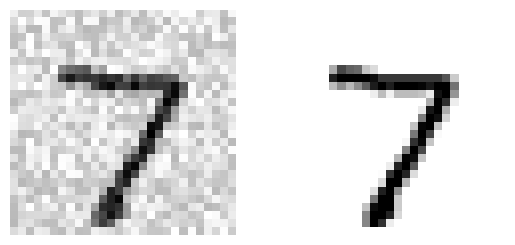

In [ ]:
#4/4 목요일

#42쪽
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

#추가자료 21쪽
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

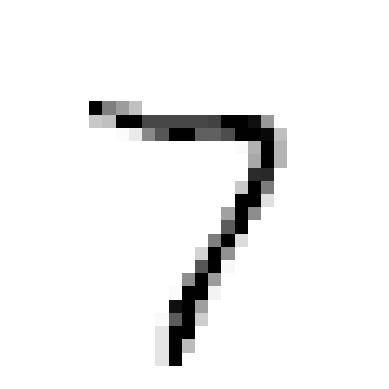

In [ ]:
#43쪽

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

#week 4-5분량 끝

In [ ]:
#연습문제 분량
#연습문제1

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
baseline_accuracy=knn_clf.score(X_test,y_test)
baseline_accuracy

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'weights':["uniform", "distance"], 'n_neighbors':[3,4,5,6]}]
knn_clf= KNeighborsClassifier()
grid_search=GridSearchCV(knn_clf,param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
grid_search.best_params_


{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9441999999999998

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy= grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

In [ ]:
#연습문제2
from scipy.ndimage import shift
#내장함수는 다 임포트해줘야 쓰지

def shift_image(image,dx,dy):
  image=image.reshape((28,28))
  shifted_image=shift(image,[dy,dx], cval=0, mode="constant")
  return shifted_image.reshape([-1])

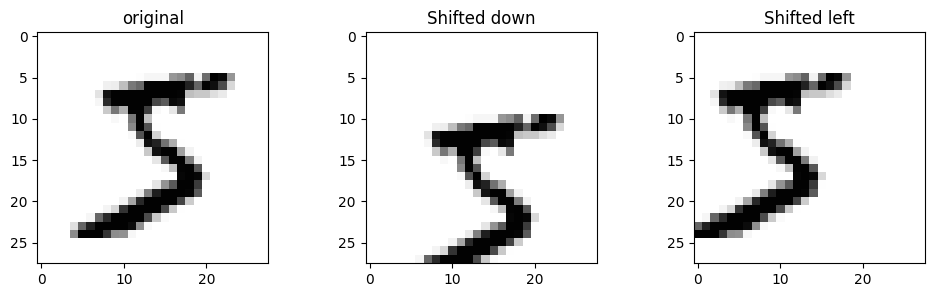

In [ ]:
#연습문제파일 9쪽
image=X_train[0]
shifted_image_down= shift_image(image,0,5)
shifted_image_left=shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("original")
plt.imshow(image.reshape(28,28), cmap="Greys")

plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28,28), cmap="Greys")

plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28,28), cmap="Greys")

plt.show()

In [ ]:
#연습문제 파일 10쪽
X_train_augmented= [image for image in X_train]
y_train_augmented= [label for label in y_train]

for dx,dy in ((-1,0), (1,0), (0,1), (0,-1)):
  for image,label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)
X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)

In [ ]:
shuffle_idx= np.random.permutation(len(X_train_augmented))
X_train_augmented=X_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

In [ ]:
knn_clf=KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented,y_train_augmented)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
augmented_accuracy= knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763